![Pythia logo.](https://github.com/mcgen-ct/tutorials/blob/main/.full/pythia/figures/pythiaLogo.png?raw=1)

# Pythia 8.3 Python Worksheet

Written by:
- Torbjörn Sjöstrand (Department of Astronomy and Theoretical Physics, Lund University)
- Peter Skands (School of Physics, Monash University)
- Stefan Prestel
- Philip Ilten (School of Physics, University of Cincinnati)
- Leif Gellerson (Department of Astronomy and Theoretical Physics, Lund University)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

The Pythia 8.3 program is a standard tool for the generation of high-energy collisions (specifically, it focuses on centre-of-mass energies greater than about 10 GeV), comprising a coherent set of physics models for the evolution from a few-body high-energy ("hard") scattering process to a complex multihadronic final state. The particles are produced in vacuum. Simulation of the interaction of the produced particles with detector material is not included in Pythia but can, if needed, be done by interfacing to external detector-simulation codes.

The Pythia 8.3 code package contains a library of hard interactions and models for initial- and final-state parton showers, multiple parton-parton interactions, beam remnants, string fragmentation and particle decays. It also has a set of utilities and interfaces to external programs.

The objective of this exercise is to teach you the basics of how to use the Pythia 8.3 event generator to study various physics aspects. As you become more familiar you will better understand the tools at your disposal, and can develop your own style to use them. Within this first exercise it is not possible to describe the physics models used in the program; for this we refer to the [Pythia 8.3 manual](https://arxiv.org/abs/2203.11601), and to all the further references found in them. For practical usage, the [Pythia 8.3 HTML manual](https://pythia.org/latest-manual/Welcome.html) provides full documentation on running and configuring Pythia. A [Pythia 8.3 Doxygen manual](https://pythia.org/latest-doxygen) is also available, although the HTML manual should always be used as the primary documentation.

## Requirements

Before running this notebook, we need to set up our environment. First, we install and import the wurlitzer module. This allows programs that have C-like backends to write their output to the Python console. In short, this allows the output of Pythia to be displayed in this notebook.

In [14]:
# Redirect the C output of Pythia to the notebook.
!pip install wurlitzer
from wurlitzer import sys_pipes_forever

sys_pipes_forever()

Next, we need to install the Pythia module.

In [15]:
# Install and import the Pythia module.
!pip install pythia8mc
import pythia8mc as pythia8

## Introduction

Pythia 8 is, by today's standards, a small package. It is completely self-contained, and is therefore easy to install for standalone usage, e.g. if you want to have it on your own laptop, or if you want to explore physics or debug code without any danger of destructive interference between different libraries. This worksheet uses Pythia's Python interface, using an installation included in the Docker container. If you would like to run Pythia 8.3 natively using `C++`, please take a look at the analogous [standalone worksheet](https://pythia.org/download/pdf/worksheet8200.pdf), which includes installation instructions. You can download the latest version at [pythia.org](https://pythia.org/).

When you use Pythia you are expected to write the main program yourself, for maximal flexibility and power. Several examples of such main programs are included with the code, to illustrate common tasks and help getting started. The section [A Hello World Program](#scrollTo=A_Hello_World_Program) gives you a simple step-by-step recipe how to write a minimal main program, that can then gradually be expanded in different directions, e.g. as in [A first realistic analysis](#scrollTo=A_first_realistic_analysis).

In the section [Input files](#scrollTo=Input_files) you will see how the parameters of a run can be read in from a file, so that the main program can be kept fixed. Many of the provided `C++` main programs therefore allow you to create executables that can be used for different physics studies without recompilation, but potentially at the cost of some flexibility. For Python usage, this is not an issue.

The final three sections provide suggestions for optional further studies, and can be addressed in any order. [CKKW-L merging](#scrollTo=CKKW-L_merging) deals with the important topic of merging of external matrix-element input of different orders, introducing the CKKW-L scheme as a suitable starting point. [Some studies of Higgs production](#scrollTo=Some_studies_of_Higgs_production) describes how you can explore various physics aspects of the Standard Model Higgs production and decay. [Further studies](#scrollTo=Further_studies), finally, collects suggestions for a few diverse studies.

While Pythia can be run standalone, it can also be interfaced with a set of other libraries. One example is `HepMC`, which is the standard format used by experimentalists to store generated events. Further main programs included with the Pythia code provide examples of linking, e.g., to `AlpGen`, `MadGraph`, `PowHeg`, `FastJet`, `ROOT`, and the Les Houches Accords LHEF, LHAPDF and SLHA.

[The Event Record](#scrollTo=The_Event_Record) contains a brief summary of the event-record structure.

Before running this notebook, we need to set up our environment. First, we install and import the `wurlitzer` module. This allows programs that have C-like backends to write their output to the Python console. In short, this allows the output of Pythia to be displayed in this notebook.

## A Hello World Program

We will now generate a single $\g \g \to \t \tbar$ event at the LHC, using Pythia's Python interface. The following example contains explanatory comments.

In [16]:
# Import the Pythia module.
import pythia8mc as pythia8

# Create a Pythia object.
pythia = pythia8.Pythia()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.315      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 27 May 2025  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 Jun 2025 at 19:14:28    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [26]:
# Configure the Pythia object.
pythia.readString("Top:gg2ttbar = on")  # Switch on process.
pythia.readString("Beams:eCM = 17000.")  # Set 14 TeV CM energy.

True

In [27]:
# Initialize, incoming pp beams are default.
pythia.init()


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with p+ at a CM energy of 1.700e+04 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | g g -> t tbar                                  601 |   1.421e-05 |
 |                                                                  |
 *-------  End PYTHIA Process Initialization -----------------------*

 *-------  PYTHIA 

True

In [19]:
# Generate an(other) event. Fill event record.
pythia.next()


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  7.000e+03, e =  7.000e+03, m =  9.383e-01.
 Beam B: id =   2212, pz = -7.000e+03, e =  7.000e+03, m =  9.383e-01.

 In 1: id =   21, x =  3.574e-03, pdf =  1.690e+01 at Q2 =  3.680e+04.
 In 2: id =   21, x =  2.582e-01, pdf =  1.538e-01 at same Q2.

 Subprocess g g -> t tbar with code 601 is 2 -> 2.
 It has sHat =  1.809e+05,    tHat = -2.327e+04,    uHat = -9.623e+04,
       pTHat =  8.471e+01,   m3Hat =  1.782e+02,   m4Hat =  1.721e+02,
    thetaHat =  7.791e-01,  phiHat =  3.709e+00.
     alphaEM =  7.885e-03,  alphaS =  1.162e-01    at Q2 =  3.786e+04.

 Impact parameter b =  9.121e-01 gives enhancement factor =  8.273e-01.
 Max pT scale for MPI =  1.400e+04, ISR =  1.400e+04, FSR =  1.400e+04.
 Number of MPI =     6, ISR =    15, FSRproc =    49, FSRreson =    24.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PYTHIA Event Listing  (hard p

True

Now you can study the output, especially the example of a complete event record (preceded by initialization information, and by kinematical-variable and hard-process listing for the same event). At this point you need to turn to the [The Event Record](#scrollTo=The_Event_Record) for a brief overview of the information stored in the event record. Documentation of the event record is can also be found under [The Event Record page](https://pythia.org/latest-manual/EventRecord.html) of the HTML manual. In Python, it is also possible to access documentation by the standard Python `help` method. Note, however, that this does not provide detailed documentation like the HTML manual does.

In [20]:
# Print documentation for the Event class in Pythia.
help(pythia.event)

Help on Event in module pythia8mc object:

class Event(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Event
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  REtaPhi(...)
 |      REtaPhi(self: pythia8mc.Event, i1: int, i2: int) -> float
 |      
 |      C++: Pythia8::Event::REtaPhi(int, int) const --> double
 |  
 |  RRapPhi(...)
 |      RRapPhi(self: pythia8mc.Event, i1: int, i2: int) -> float
 |      
 |      C++: Pythia8::Event::RRapPhi(int, int) const --> double
 |  
 |  __getitem__(...)
 |      __getitem__(self: pythia8mc.Event, i: int) -> pythia8mc.Particle
 |      
 |      C++: Pythia8::Event::operator[](int) --> class Pythia8::Particle &
 |  
 |  __iadd__(...)
 |      __iadd__(self: pythia8mc.Event, addEvent: pythia8mc.Event) -> pythia8mc.Event
 |      
 |      C++: Pythia8::Event::operator+=(const class Pythia8::Event &) --> class Pythia8::Event &
 |  
 |  __init__(...)
 |      __init__(*args, **k

An important part of the event record is that many copies of the same particle may exist, but only those with a positive status code are still present in the final state. To exemplify, consider a top quark produced in the hard interaction, initially with positive status code. When later a shower branching $\t \to \t \g$ occurs, the new $\t$ and $\g$ are added at the bottom of the then-current event record, but the old $\t$ is not removed. It is marked as decayed, however, by negating its status code. At any stage of the shower there is thus only one "current" copy of the top. After the shower, when the final top decays, $\t \to \b \W^+$, also that copy receives a negative status code. When you understand the basic principles, see if you can find several copies of the top quarks, and check the status codes to figure out why each new copy has been added. Also note how the mother/daughter indices tie together the various copies.

## A first realistic analysis

We will now gradually expand the skeleton program from above, towards what would be needed for a more realistic analysis setup. In the following input cell, we have consolidated all the necessary code for ease of editing and use. For each suggestion below, simply copy the relevant code here and rerun the input cell.

In [21]:
# Import the Pythia module.
import pythia8mc as pythia8

# Create a Pythia object.
pythia = pythia8.Pythia()

# Configure the Pythia object.
pythia.readString("Top:gg2ttbar = on")  # Switch on process.
pythia.readString("Beams:eCM = 14000.")  # Set 14 TeV CM energy.

# Initialize, incoming pp beams are default.
pythia.init()

# Generate an(other) event. Fill event record.
pythia.next()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.315      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 27 May 2025  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 Jun 2025 at 19:19:33    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

True


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  7.000e+03, e =  7.000e+03, m =  9.383e-01.
 Beam B: id =   2212, pz = -7.000e+03, e =  7.000e+03, m =  9.383e-01.

 In 1: id =   21, x =  3.574e-03, pdf =  1.690e+01 at Q2 =  3.680e+04.
 In 2: id =   21, x =  2.582e-01, pdf =  1.538e-01 at same Q2.

 Subprocess g g -> t tbar with code 601 is 2 -> 2.
 It has sHat =  1.809e+05,    tHat = -2.327e+04,    uHat = -9.623e+04,
       pTHat =  8.471e+01,   m3Hat =  1.782e+02,   m4Hat =  1.721e+02,
    thetaHat =  7.791e-01,  phiHat =  3.709e+00.
     alphaEM =  7.885e-03,  alphaS =  1.162e-01    at Q2 =  3.786e+04.

 Impact parameter b =  9.121e-01 gives enhancement factor =  8.273e-01.
 Max pT scale for MPI =  1.400e+04, ISR =  1.400e+04, FSR =  1.400e+04.
 Number of MPI =     6, ISR =    15, FSRproc =    49, FSRreson =    24.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PYTHIA Event Listing  (hard p

- Often, we wish to mix several processes together. To add the process $\q \qbar \to \t \tbar$ to the above example, just include a third `pythia.readString` call
```python
pythia.readString("Top:qqbar2ttbar = on")
```
Note that the `Pythia` object must be reinitialized whenever a new configuration is added.

- Now we wish to generate more than one event. To do this, introduce a loop around `pythia.next()`, so the code now reads as the following input cell. If you have already created and initialized the `Pythia` object, you can simply run this cell to see the output.

In [28]:
for iEvent in range(5):
    pythia.next()

> Hereafter, we will call this the event loop. The program will now generate 5 events; each call to `pythia.next()` resets the event record and fills it with a new event. To list more of the events, you also need to add
> ```python
> pythia.readString("Next:numberShowEvent = 5")
> ```
> along with the other `pythia.readString` commands, or simply add `pythia.event.list()` after `pythia.next()`.

- To obtain statistics on the number of events generated of the different kinds, and the estimated cross sections, add the following, just before the end of the program. If you have already generated a few events, you can just run the input cell below.

In [29]:
pythia.stat()


 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |                                   |                        |
 | g g -> t tbar                                  601 |          75          5          5 |   7.099e-07  1.753e-07 |
 |                                                    |        

- During the run you may receive problem messages. These come in three kinds:
    - a *warning* is a minor problem that is automatically fixed by the program, at least approximately;
    - an *error* is a bigger problem, that is normally still automatically fixed by the program, by backing up and trying again;
    - an *abort* is such a major problem that the current event could not be completed; in such a rare case `pythia.next()` is false and the event should be skipped.
Thus the user need only be on the lookout for aborts. During event generation, a problem message is printed only the first time it occurs (except for a few special cases). The above-mentioned `pythia.stat()` will then tell you how many times each problem was encountered over the entire run.

- Studying the event listing for a few events at the beginning of each run is useful to make sure you are generating the right kind of events, at the right energies, etc. For real analyses, however, you need automated access to the event record. The Pythia  event record provides many utilities to make this as simple and efficient  as possible. To access all the particles in the event record, use the following loop after calling `pythia.next()` (typically within the event loop).

In [30]:
for prt in pythia.event:
    print(prt.id())

90
2212
2212
21
21
6
-6
21
21
6
-6
21
21
21
6
-6
21
21
21
21
6
-6
21
21
21
21
21
-6
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
6
-6
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
6
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
6
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
6
-6
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
2203
1
2
2103
24
5
5
21
24
21
21
5
21
21
24
-3
3
24
21
21
5
21
21
21
-3
3
-3
21
21
-3
-24
-5
-5
21
-24
-2
2
-5
-1
2
-1
21
2
-1
21
21
21
21
2
21
21
21
21
21
21
13
-14
13
22
-14
21
-323
111
111
321
321
-313
513
5
21
21
21
21
-3
-513
-213
321
-321
223
2212
223
-2212
321
1
21
21
21
21
21
21
21
21
21
21
21
21
-2
111
-211
111
211
311
-311
-211
211
221
111
-211
211
113
111
-211
2214
-2214
223
211
2112
-2212
213
111
-213
321
-321
111
2
21
21
21
21
21

> This is called the `particle loop`. Inside this loop, you can access the properties of each particle `prt`. For instance, the method `id()` returns the PDG identity code of a particle (see [Identity codes](identityCodes)). The `print` statement, therefore, will give a list of the PDG code of every particle in the event record. Note, it is also possible to access particles via index, e.g.
> ```python
> for i in range(0, pythia.event.size()):
>     print(pythia.event[i])
> ```
> The entries of the `Event` class in Pythia are particles of type `Particle`. The `Particle` class within Pythia provides information on the particle, including fundemental properties as well as kinematics. The [Particle Properties page](https://pythia.org/latest-manual/ParticleProperties.html) of the HTML manual gives full details on all the available information. Below, you can see the available methods using `help`.

In [ ]:
# Print documentation for the Particle class in Pythia.
help(pythia8.Particle)

- As mentioned above, the event listing contains all partons and particles, traced through a number of intermediate steps. Eventually, the top will decay ($\t \to \W \b$), and by implication it is the last top copy in the event record that defines the definitive top production kinematics, just before the decay. You can obtain the location of this final top  e.g. by inserting a line just before the particle loop
```python
top = None
```
and a line inside the particle loop
```python
if prt.id() == 6: top = prt
```
The value of `top` will be set every time a top is found in the event record. When the particle loop is complete, `top` will now point to the final top in the event record. The index of this particle in the event record can be retrieved by calling `top.index()`. Executing the cell below will find the final $\t$ of the last generated event.

In [32]:
top = None
for prt in pythia.event:
    if prt.id() == 6:
        top = prt

- In addition to the particle properties in the event listing, there are also methods that return many derived quantities for a  particle, such as transverse momentum, `top.pT()`, and pseudorapidity, `top.eta()`. Use these methods to print out the values for the final top found above.

In [33]:
top.pT(), top.eta()

(182.27089573217233, -1.6741478120207323)

- We now want to generate more events, say 1000, to view the shape of these distributions. Inside Pythia is a very simple histogramming class, see [Histograms](#scrollTo=Histograms), that can be used for rapid check/debug purposes. To book a histogram (typically before the event loop), use the following, where the last three arguments are the number of bins, the lower edge and the upper edge of the histogram, respectively.

In [35]:
pT = pythia8.Hist("top transverse momentum", 100, 0.0, 200.0)
eta = pythia8.Hist("top pseudorapidity", 100, -5.0, 5.0)

> Now we want to fill the histograms in each event, which can be done as follows.

In [36]:
pT.fill(top.pT())
eta.fill(top.eta())

> Finally, to write out the histograms, after the event loop we can write the following, typically at the end of the event loop.

In [37]:
print(pT)



  2025-06-21 19:42       top transverse momentum

        1.00*10^ 0                                                                                             X        
        0.96*10^ 0                                                                                             X        
        0.92*10^ 0                                                                                             X        
        0.88*10^ 0                                                                                             X        
        0.84*10^ 0                                                                                             X        
        0.80*10^ 0                                                                                             X        
        0.76*10^ 0                                                                                             X        
        0.72*10^ 0                                                                                   

> In Python, it is also simple to plot this histogram with `Matplotlib`. First, we need to create our `x` and `y` vectors to plot from the histogram.

In [38]:
x = [(x0 + x1) / 2 for x0, x1 in zip(pT.getBinEdges(), pT.getBinEdges()[1:])]
y = pT.getBinContents()

> Next, we can use `Matplotlib` as normal.

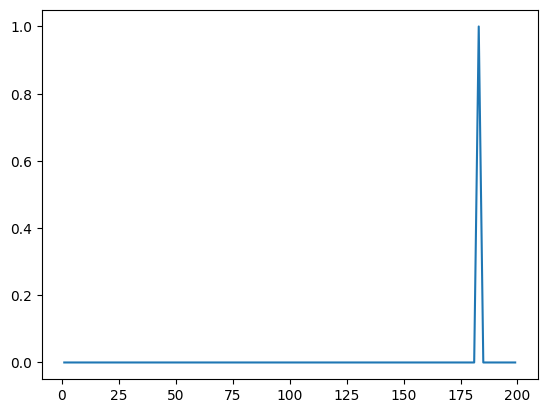

In [39]:
%matplotlib inline
from matplotlib import pyplot

pyplot.plot(x, y)
pyplot.show()

> Do you understand why the $\eta$ distribution looks the way it does? Propose and study a related but alternative measure and compare.

- As a final standalone exercise, consider plotting the charged  multiplicity of events. You then need to have a counter set to zero for each new event. Inside the particle loop this counter should be incremented whenever the particle `isCharged()` and `isFinal()`. For the histogram, note that it can be treacherous to have bin limits at integers, where roundoff errors decide whichever way they go. In this particular case only even numbers are possible, so 100 bins from -1 to 399 would still be acceptable.

- Now, to make it easier to examine the event record and discuss the physics content, please execute the following command.

In [40]:
commands = """import pythia8mc as pythia8; pythia = pythia8.Pythia(); pythia.readString("Top:gg2ttbar = on"); pythia.readString("Beams:eCM = 14000."); pythia.init(); pythia.next(); pythia.event.list();"""

import os

os.system(f"python -c '{commands}' > ./evt_record.txt")

0

- Please navigate to the "Home Page" tab in your browser and open the file "evt_record.txt" in a different window.

## Input files

When running structure developed above via `C++` code, it is necessary to recompile the main program for each minor change, e.g. if you want to rerun with more statistics. This is not time-consuming for a simple  standalone run, but may become so for more realistic applications. Therefore, parameters can be put in special input "card" files that are read by the main program. For Python analyses, like the examples here, compilation is no longer an issue, but it can be cleaner to factorize the code from the settings that are passed to Pythia. In this way, it is easy to track settings changes vs. analysis changes.

We will now create such a file, with the same settings used in the example program above.

In [41]:
with open("mymain01.cmnd", "w") as file:
    file.write(
        """
# t tbar production at the LHC
Beams:idA = 2212          # first incoming beam is a 2212, i.e. a proton.
Beams:idB = 2212          # second beam is also a proton.
Beams:eCM = 8000.         # the cm energy of collisions.
Top:gg2ttbar = on         # switch on the process g g -> t tbar.
Top:qqbar2ttbar = on      # switch on the process q qbar -> t tbar.
Main:numberOfEvents = 100 # set the number of events to generate.
"""
    )

The `mymain01.cmnd` file can contain one command per line, of the type
```
variable = value
```
All variable names are case-insensitive (the mixing of cases has been chosen purely to improve readability) and non-alphanumeric characters (such as !, \# or \$) will be interpreted as the start of a comment. All valid variables are listed in the HTML manual. Cut-and-paste of variable names can be used to avoid spelling mistakes.

The final step is to modify our program to use this input file. The name of this input file can be hardcoded in the main program, but for more flexibility, it can also be provided as a command-line argument when running a Python file as a script. To do this in Python, we recommend using `argparse`.

```python
# Set up the arguments.
import argparse

parser = argparse.ArgumentParser(description="Description of what the program does.")
parser.add_argument(
    "-c",
    "--cmnd",
    help="Command file.",
    required=True,
    type=str,
    default="mymain01.cmnd",
)
args = vars(parser.parse_args())

# Read in the command file.
pythia.readFile(args.cmnd)
```

Here, we can just create a Pythia instance, read in the file, and initialize.

In [42]:
import pythia8mc as pythia8

pythia = pythia8.Pythia()
pythia.readFile("mymain01.cmnd")
pythia.init()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.315      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 27 May 2025  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 Jun 2025 at 19:57:16    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

True

In addition to all the internal `Pythia` variables there exist a few defined in the database but not actually used. These are intended to be useful in the main program, and thus begin with `Main:`. The most basic of those is `Main:numberOfEvents`, which you can use to specify how many events you want to generate. To make this have any effect, you need to read it in the main program, after the `pythia.readFile(...)` command, by a line like the following.

In [43]:
nEvent = pythia.mode("Main:numberOfEvents")
for iEvent in range(nEvent):
    pythia.next()


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  4.000e+03, e =  4.000e+03, m =  9.383e-01.
 Beam B: id =   2212, pz = -4.000e+03, e =  4.000e+03, m =  9.383e-01.

 In 1: id =   21, x =  1.660e-02, pdf =  5.415e+00 at Q2 =  3.087e+04.
 In 2: id =   21, x =  1.299e-01, pdf =  5.694e-01 at same Q2.

 Subprocess g g -> t tbar with code 601 is 2 -> 2.
 It has sHat =  1.380e+05,    tHat = -6.132e+04,    uHat = -1.666e+04,
       pTHat =  2.985e+01,   m3Hat =  1.732e+02,   m4Hat =  1.731e+02,
    thetaHat =  2.681e+00,  phiHat =  2.829e+00.
     alphaEM =  7.876e-03,  alphaS =  1.178e-01    at Q2 =  3.087e+04.

 Impact parameter b =  4.236e-01 gives enhancement factor =  2.758e+00.
 Max pT scale for MPI =  8.000e+03, ISR =  8.000e+03, FSR =  8.000e+03.
 Number of MPI =     7, ISR =    18, FSRproc =    59, FSRreson =    18.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PYTHIA Event Listing  (hard p

You are now free to play with further options in the input file, such as:
- change the top mass, which by default is 171 GeV.
```
6:m0 = 175
```
- switch off final-state radiation.
```
PartonLevel:FSR = off
```
- switch off initial-state radiation.
```
PartonLevel:ISR = off
```
- switch off multiparton interactions.
```
PartonLevel:MPI = off
```
- different combined tunes, in particular to radiation and multiparton interactions parameters. In part this reflects that no generator is perfect, and also not all data is perfect, so different emphasis will result in different optima.
```
Tune:pp = 3 # (or other values between 1 and 17)
```
- all runs by default use the same random-number sequence, for reproducibility,
but you can pick any number between 1 and 900,000,000 to obtain a unique sequence.
```
Random:setSeed = on
Random:seed = 123456789
```
For instance, check the importance of FSR, ISR and MPI on the charged  multiplicity of events by switching off one component at a time. The possibility to use command-line input files is further illustrated e.g. in `main132.cc` and `main231.cc`.

You have now completed the core part of the worksheet - congratulations! From now on you should be able to take off in different directions, depending on your interests. The following three sections contain examples of further possible studies, and can be addressed in any order.

## CKKW-L merging

The main programs we have constructed and studied in the previous sections have one common drawback: all start from the Pythia 8 internal library of lowest-order processes, and then add higher-order corrections entirely by the internal parton-shower machinery. This will give reliable results for soft and collinear configurations, but less so for  multiple hard, well-separated jets. To model the latter similarly well, we need to include external input from higher-order calculations at tree level and, where feasible, at one-loop level. A number of different external programs can provide such input, using the LHA/LHEF standard format to transfer information, usually as LHE files (see [Generic User Process Interface for Event Generators](https://arxiv.org/abs/hep-ph/0109068), [A standard format for Les Houches Event Files](https://arxiv.org/abs/hep-ph/0609017), and [Les Houches 2013: Physics at TeV Colliders: Standard Model Working Group Report](https://arxiv.org/abs/1405.1067)). The hard-process events stored in these files will be accepted or rejected in such a way that  doublecounting between different parton multiplicities is removed, resulting in a smooth transition between the multiplicities, and between the external input and the internal handling of parton showers. These two tasks usually go hand in hand.

Many different schemes have been proposed for matrix element + parton shower merging (MEPS), and a comprehensive selection of such schemes is available with the Pythia 8 distribution, including

- tree-level merging: *MLM* jet matching (see [Matching matrix elements and shower evolution for top-quark production in hadronic collisions](https://arxiv.org/abs/hep-ph/0611129), *MadGraph*- or *AlpGen*-style), *CKKW-L* merging (see [Matching Tree-Level Matrix Elements with Interleaved Showers](https://arxiv.org/abs/1109.4829)), and unitarised *ME*+*PS* merging (*UMEPS*, see [Unitarising Matrix Element + Parton Shower merging](https://arxiv.org/abs/1211.4827)); and
- next-to-leading order merging: *NL*$^3$ merging and unitarised NLO+PS merging (*UNLOPS*, see [Merging Multi-leg NLO Matrix Elements with Parton Showers](https://arxiv.org/abs/1211.7278)).

The setup of such merging schemes is documented in the [Matching and Merging page](https://pythia.org/latest-manual/MatchingAndMerging.html) of the HTML manual manual with further subpages, and is illustrated in several of the example main programs.

Here we will experiment with the *CKKW-L* scheme, which was the first merging scheme available in *Pythia 8*, and also is among the simpler to work with. We will take the `main162` example main program as a starting point for our studies, reproduced inline below. In its general structure it closely resembles the main program(s) we already constructed step by step, so we will only need to comment on aspects that are new for the merging game. The process $\W^+ + \leq 2$ jets will be taken as an example. It uses the LHE files:
- `w+_production_lhc_0.lhe` for $\W^+ + 0$ partons,
- `w+_production_lhc_1.lhe` for $\W^+ + 1$ parton,
- `w+_production_lhc_2.lhe` for $\W^+ + 2$ partons,
in the `examples` directory to produce a result that simultaneously describes $\W^+ + 0,1,2$ jet observables with leading-order matrix elements, while also including arbitrarily many shower emissions. Jets are here defined by a clustering procedure on the partons thus generated. (We omit other effects from consideration, such as MPIs or hadronization.)

In [ ]:
# First, we need to download Pythia to access the examples.
!git clone --depth 1 https://gitlab.com/Pythia8/releases.git

# Next, we need to change to the examples directory.
%cd releases/examples

In [ ]:
# Create a little plotting tool for the Pythia histogram class.
%matplotlib inline
from matplotlib import pyplot


def plot(hist, xlabel=None, ylabel="entries"):
    x = [(x0 + x1) / 2 for x0, x1 in zip(hist.getBinEdges(), hist.getBinEdges()[1:])]
    y = hist.getBinContents()
    pyplot.plot(x, y)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()

In [ ]:
# Initialize the Pythia object.
import pythia8mc as pythia8

# Generator. Input parameters.
pythia = pythia8.Pythia()
pythia.readFile("main162ckkwl.cmnd")
pythia.readString("Merging:includeWeightInXsection = off")

# Extract number of events and max number of jets in merging.
nEvent = pythia.mode("Main:numberOfEvents")
nMerge = pythia.mode("Merging:nJetMax")

# Histograms combined over all jet multiplicities.
pTWsum = pythia8.Hist("pT of W, summed over all subruns", 100, 0.0, 200.0)

# Merged total cross section, summed over subruns.
sigmaTotal = 0.0

In [ ]:
# Loop over subruns with varying number of jets.
for iMerge in range(1, nMerge + 1):
    sigmaSample = 0.0

    # Read in name of LHE file for current subrun and initialize.
    pythia.readFile("main162ckkwl.cmnd", iMerge)
    pythia.init()

    # Histograms for current jet multiplicity.
    weightNow = pythia8.Hist("event weights, current subrun", 100, 0.0, 2.5)
    pTWnow = pythia8.Hist("pT of W, current subrun", 100, 0.0, 200.0)

    # Start event generation loop.
    for iEvent in range(0, nEvent):
        # Generate next event. Break out of event loop if at end of LHE file.
        if not pythia.next():
            if pythia.infoPython().atEndOfFile():
                break
            else:
                continue

        # Get CKKWL weight of current event. Histogram and accumulate it.
        evtweight = pythia.infoPython().weight()
        weight = pythia.infoPython().mergingWeight()
        weightNow.fill(weight)
        weight *= evtweight
        sigmaSample += weight

        # Do nothing for vanishing weight (event record might not be filled).
        if weight == 0:
            continue

        # Find the final copy of the W+, which is after the full shower.
        prtW = None
        for prt in pythia.event:
            if prt.id() == 24:
                prtW = prt

        # Fill the pT of the W histogram, with CKKWL weight.
        if prtW:
            pTWnow.fill(prtW.pT(), weight)

    # Normalize pTW histogram, convert mb -> pb, and correct for bin width.
    pTWnow *= (
        1e9 * pythia.infoPython().sigmaGen() / (2.0 * pythia.infoPython().nAccepted())
    )

    # Print cross section and histograms for current subrun.
    # Alternatively, use print(hist) for Pythia style histogram printing.
    pythia.stat()
    plot(weightNow, f"event weights, subrun {iMerge}")
    plot(pTWnow, f"$p_T(W^+)$, subrun {iMerge}")

    # Sum up merged cross section of current run.
    sigmaSample *= pythia.infoPython().sigmaGen() / float(
        pythia.infoPython().nAccepted()
    )
    sigmaTotal += sigmaSample

    # Add current histogram to the combined one. End of subrun loop.
    pTWsum += pTWnow

In [ ]:
# Print final histograms and info on merged cross section..
plot(pTWsum, r"$\sum p_T(W^+)$")
print(f"The inclusive cross section after merging is: {sigmaTotal:.4e} mb.")

Say we want to study a one-jet observable, e.g. the transverse momentum of the jet $j$ in events with *exactly* one jet. In this case, we want to take "hard" jets from the $\p\p \to \W j$ matrix element (ME), while "soft" jets should be modelled by parton-shower (PS) emissions off the $\p\p \to \W$ states. In order to smoothly merge these two samples, we have to know in which measure "hard" is defined, and which value of this measure separates the hard and soft regions. In `main162ckkwl.cmnd`, these definitions are:
```
Merging:doKTMerging = on
Merging:ktType      = 2
Merging:TMS         = 30.
```
This will enable the merging procedure, with the merging scale defined by the minimal longitudinally invariant $k_\perp$ separation between partons (there are many other possibilities, by `ktType` value or by your own choice of merging procedure), with a merging scale $\tms = 30$ GeV. Such a definition fixes what we mean when we talk about "hard" and "soft" jets:

type | definition
-----|:-----
Hard jets: | $\min\{$any relative $k_{\perp}$ between sets of partons$\} > \tms$
Soft jets: | $\min\{$any relative $k_{\perp}$ between sets of partons$\} < \tms$

Thus, in order for the merging prescription to work, we need to remove phase space regions with $\min\{$any $k_{\perp}\} < \tms$ from the $\W+1$-parton matrix element calculation. Otherwise, there would be an overlap between the "soft jet" and "hard jet" samples.

This requirement means that the merging-scale definition should be implemented as a *cut in the matrix element generator*. Alternatively, it is possible to enforce the cut in *Pythia 8* internally, assuming that the ME is calculated with more inclusive (i.e. loose) cuts. This is illustrated below, where the triangle depicts the whole phase space, with soft or collinear divergences located on the edges. The yellow area symbolises the phase-space region used for the generation of the LHEF events, while the green area represents the phase space after *Pythia 8* has enforced the merging-scale cut on the input events. In order to correctly apply the merging-scale cut, the green area has to be fully contained inside the yellow one, i.e. the cut in the ME generator has to be more inclusive than the $\tms$-cut. For optimal efficiency, the yellow and green areas should be identical. This can be the case in *MadGraph 5* (see [MadGraph 5 : Going Beyond](https://arxiv.org/abs/1106.0522)), when using the generation cuts `ktdurham` (corresponding to `Merging:doKTMerging = on`) and `ptpythia` (corresponding to `Merging:doPTLundMerging = on`).

![Schematic illustration phase-space cuts.](https://github.com/mcgen-ct/tutorials/blob/main/.full/pythia/figures/phaseSpaceCuts.png?raw=1)

After the merging-scale definition, we define the underlying process. To tell *Pythia 8* that we want to merge additional jets in $\W$-boson production, we specify which is the core process, using *MadGraph* notation, where the final state is defined by the $\W^+$ decay products rather than by the $\W^+$ itself:
```
Merging:Process = pp>e+ve
```
in `main162ckkwl.cmnd`. Finally, the setting
```
Merging:nJetMax = 2
```
tells the program to include the pre-generated ME events for up to two additional jets.

In the merging example given above, the input file `main162ckkwl.cmnd` is read early on by the `pythia.readFile(...)` command. This gives access to the number of events to be read from each LHE file, and the number of LHE files to be processed. The *subrun loop* then handles each LHE file, one at a time. Specifically, the
```python
pythia.readFile("main162ckkwl.cmnd", iMerge)
```
uses the `iMerge` argument when reading the `main162ckkwl.cmnd` file, so that only those commands following the respective `Main:subrun = iMerge` labels are read. (Plus that everything before the first `Main:subrun` is re-read, but that does not matter since it stays the same.) Thus the proper LHE file is picked up for each jet multiplicity. The
```
Beams:frameType = 4
```
also informs *Pythia* that beam parameters should be read from the header section of the LHE file, and not set by the user.

Then we enter the event loop. The already-discussed difference in phase-space coverage can lead to a fair fraction of all input events being rejected. Thus the number of produced events can be lower than the requested `Main:numberOfEvents` one if the file is not large enough. (When no further events can be read the `pythia.next()` command will return `False`, so that the event loop can be exited at the end of the LHE file.) Those events that survive come with a weight
```python
weight = pythia.infoPython().mergingWeight()
```
which contains Sudakov factors (to remove the double counting between samples of different multiplicity), $\as$ ratios (to incorporate the $\as$ running not available in matrix element generators), and ratios of parton distributions (to include variable factorization scales). This weight *must* be used when filling histogram bins, as is e.g. done by
```python
pTWnow.fill( pTW, weight)
```
for the $p_{\perp}$ of the $\W$ boson. The sum of weights also goes into the calculation of the total generated cross section.

After the event loop, the contribution to the $p_{\perp}$ of the $\W$ boson from this particular multiplicity is normalised by
```python
pTWnow *= 1e9*pythia.infoPython().sigmaGen()/(2.*pythia.infoPython().nAccepted())
```
where the ratio of the two `pythia.infoPython()` numbers is the weight per event, the `1e9` is for conversion from mb to pb, and the `2.` compensates for the bin width to give cross section per GeV. This number and more detailed statistics are printed to the terminal. As a final step, the contribution of the current subrun is added to the total histogram
```python
pTWsum += pTWnow
```
and the subrun loop begins over with the next LHE file. The complete histogram, combining all multiplicities, is printed after the sub-run loop has concluded.

When you run the program above, note that some warning messages are issued routinely as part of the merging machinery, in the steps where a clustering history is found and where it is decided whether an event fails the merging scale cuts. Warnings from the SLHA interface also are irrelevant. So no reason to worry about any of that.

After the first run with the main program as is, you can try different variations.
- Convince yourself that the variation of the "merging weight" is moderate.
- Check in which $p_\perp$ regions which jet multiplicity contributes most.
- Study how the individual contributions and the sum changes when you run with a maximum of 1 or 0 jets, instead of the default 2.
- Compare the $p_\perp$ spectrum of the $\W$ with what you get from running the internal *Pythia* production process, by  straightforward modifications of your original *Pythia* program.
- A major limitation is the size of the event files that come with the standard *Pythia* distribution, for space reasons. If you have a decent internet connection you can download larger files, with 100,000 events for each multiplicity up to $\W + 4$ partons: [`wp_tree_0.lhe.gz`](https://pythia.org/download/lhe/wp_tree_0.lhe.gz), [`wp_tree_1.lhe.gz`](https://pythia.org/download/lhe/wp_tree_1.lhe.gz), [`wp_tree_2.lhe.gz`](https://pythia.org/download/lhe/wp_tree_2.lhe.gz), [`wp_tree_3.lhe.gz`](https://pythia.org/download/lhe/wp_tree_3.lhe.gz), and [`wp_tree_4.lhe.gz`](https://pythia.org/download/lhe/wp_tree_4.lhe.gz). With these files you can repeat the exercise above, and in particular check how much is gained by including the further $\W + 3$ and $\W + 4$ samples. To run through all events in the files takes a while, so check with a fraction of the sample to begin with, and be prepared to do something else while you wait for the full run to complete. Note that you will need to change `main162ckkwl.cmnd` to update these filenames with the `.gz` extension.
- Alternatively, if you are already a *MadGraph* user, you could generate your own LHE files and merge them. This would take some time, however, in particular for the higher multiplicities, so may not be an option.
- Use a jet finder to analyze the final state, and plot the $\pT$ spectra for the first, second, and third hardest jets, combining separate contributions similarly we already did for the $\W$ $\pT$ spectrum. Instructions how to use the built-in `SlowJet` jet finder can be found in [Jet Finding](#scrollTo=Jet_finding).
- Check the variation of merged predictions with $\tms$. You can  do this by using an "inclusive" event sample, and having *Pythia* enforce a stronger $\tms$ cut. In which phase-space region is the $\tms$ variation most visible?
- Switch between the "wimpy" and "power" options for maximal shower scales by choosing values for `TimeShower:pTmaxMatch` and `SpaceShower:pTmaxMatch`. Are the effects more visible in merged or non-merged predictions?

Once you have familiarised yourself with the example, you can experiment with more advanced settings in `main162ckkwl.cmnd`, as well as explore the other available `main162` command files: `main162mess.cmnd`, `main162nl3.cmnd`, `main162umeps.cmnd`, `main162unlops.cmnd`. When working directly with *Pythia* via its natice `C++` interface, you can also try `main164.cc` which is intended as a general matching and merging "blackbox" and can be run with several `.cmnd` files for different matching/merging options.

## Some studies of Higgs production

The discovery of the Higgs boson has been one of the main accomplishments of the LHC to date. Generators have been part of that story, right from the early days when the ATLAS and CMS detectors were designed in such a way as to permit that discovery. This section offers exercises intended to explore the physics of Higgs production from various aspects, with *Pythia* as guide.

### Production kinematics

The dominant production channel is $\g\g\to\H^0$. To study the kinematics distribution of the Higgs, the existing top production program could easily be modified. Instead of switching on top production, use `HiggsSM:gg2H = on`. And instead of looking for the last top copy before decay, look for the last Higgs copy `prtH`, ie. the last particle with `id() == 25`. Once found the `prtH` methods can be used to extract and histogram Higgs kinematics distributions, like for the top. In addition to the transverse momentum `pT()` you can compare the distributions for true rapidity `y()` and for pseudorapidity `eta()`.

### Production processes

While $\g\g \to \H^0$ is the main Higgs production channel, it is not the only one. Do a run with `HiggsSM:all = on` to check which are implemented and their relative importance. Also figure out how you could generate one of the less frequent processes on its own, either from the [HTML manual](https://pythia.org/latest-manual/Welcome.html) or by making some deductions from the output with all processes.

In order to get decent cross-section statistics faster, you can use `PartonLevel:all = off` to switch off everything except the hard-process generation itself. One price to pay is that the kinematics distributions for the Higgs are not meaningful. If instead complete events are generated you can study how the transverse-momentum distribution varies between processes. What are the reasons behind the significant differences?

### Decay channels

Also the decay channels and branching ratios in the Higgs decay are of interest. Here no ready-made statistics routines exist, so you have to do it yourself. You already have the decaying Higgs, `prtH`. Since the standard decay modes are two-body, they can be accessed as:
```python
dau1 = pythia.event[prtH.daughter1()]
dau2 = pythia.event[prtH.daughter2()]
```
and from that you can get the identities of the daughters. Introduce counters for all the decay modes you come to think of,that you use to derive and print branching ratios. Print the daughter identities in the leftover decays, where you did not yet have any counters, and iterate until you catch it all.

In this case, `PartonLevel:all = off` cannot be used, since then one does not get to the decays, at least not with the information in `pythia.event`. But you can combine
```
PartonLevel:ISR = off # to switch off initial-state radiation,
PartonLevel:FSR = off # to switch off final-state radiation,
PartonLevel:MPI = off # to switch off multiparton interactions, and
HadronLevel:all = off # to switch off hadronization and decays,
```
to get almost the same net time saving.

### Mass distribution

By now the Higgs mass is pretty well pinned down, but you can check what the branching ratios would have been with another mass, e.g. by `25:m0 = 150.` for a 150 GeV Higgs.

On a related note, the Higgs mass is generated according to a Breit-Wigner distribution, convoluted with parton densities. Can you resolve this shape for the default Higgs mass? How does it change had the Higgs been heavier, say at 400 GeV?

### Associated jets

Let us return to the different production channels, which give different event characteristics. Well-known is that the $\q \q \to \q \q \H^0$ processes give rise to jets at large rapidities, that can be used for tagging purposes. This can be studied as follows.

The two relevant processes are `HiggsSM:ff2Hff(t:ZZ)` and `HiggsSM:ff2Hff(t:WW)` for $\Z^0 \Z^0$ and $\W^+ \W^-$
fusion ($\f$ here denotes a fermion; the same processes also exist e.g. at $\e^+ \e^-$ colliders), that are to be compared with the standard $\g\g \to \H^0$ one.

Find jets using the `SlowJet` class, see [Jet finding](#scrollTo=Jet_finding), e.g. using the anti-$k_{\perp}$ algorithm with $R = 0.7$, $p_{\perp\mathrm{min}} = 30$~GeV and $\eta_{\mathrm{max}} = 5$.

One problem is that also the Higgs decay products can give jets, which we are not interested in here. To avoid this, we can switch off Higgs decays by `25:mayDecay = off`. This still leaves the Higgs itself in the event record. A call `prtH.statusNeg()` will negate its status code, and since `slowJet.analyze(...)` only considers the final particles, i.e. those with positive status, the Higgs is thus eliminated.

Now study the $\pT$ and rapidity spectrum of the hardest jets, and compare those distributions for the two processes. Also study how many jets are produced in the two cases.

### Underlying event

Several mechanisms contribute to the overall particle production in Higgs events. This can be studied e.g. by histogramming the charged particle distribution.

You then need to have a counter set to zero for each new event. Inside the particle loop this counter should be incremented whenever the particle `isFinal()` and `isCharged()`. For the histogram, note that it can be treacherous to have bin limits at integers, where roundoff errors decide whichever way they go. In this particular case only even numbers are possible, so 100 bins from $-1$ to 399 would still be acceptable, for instance.

Once you have the distribution down for normal events, study what happens if you remove ISR, FSR and MPI one by one or all together. Also study the contribution of the Higgs decay itself to the multiplicity, e.g. by setting the Higgs stable. Reflect on why different combinations give the pattern they do, e.g. why ISR on/off makes a bigger difference when MPI is on than off.

### Decay properties

The decay mode $\H^0 \to \Z^0 \Z^0 \to \ell^+ \ell^- \ell'^+ \ell'^-$, $\ell, \ell' = \e, \mu$, is called the gold-plated one, since it stands out so well from backgrounds. It also offers angular correlations that probe the spin of a Higgs candidate.

For now consider a simpler, but still interesting, pair of distributions: the mass spectra of the two $\Z^0$ decay products. Plot them for the lighter and the heavier of the two separately, and compare shapes and average values. To improve statistics, you can use `25:onMode = off` to switch off all decay channels, and then `25:onIfMatch = 23 23` to switch back on the decay to $\Z^0 \Z^0$ (and nothing else). Further, neither ISR, FSR, MPI nor hadronization affect the mass distributions, so this allows some speedup.

How can one qualitatively understand why the two masses tend to be so far apart, rather than roughly comparable?

### Comparison with $\Z^0$ production

One of the key reference processes at hadron colliders is $\Z^0$ production. To lowest order it only involves one process, $\q\qbar \to \gamma^*/\Z^0$, accessible with `WeakSingleBoson:ffbar2gmZ = on`. One complication is that the process involves $\gamma^*/\Z^0$ interference, and so a significant enhancement at low masses, even if the combined particle always is classified with code 23, however.

Compare the two processes $\g\g \to \H^0$ and $\q\qbar \to \gamma^*/\Z^0$, with respect to the $\pT$ distribution of the boson and the total charged multiplicity of the events. So as to remove the dependence on the difference in mass, you can set a specific mass range in the $\gamma^*/\Z^0$ generation with `PhaseSpace:mHatMin = 124` and `PhaseSpace:mHatMax = 126`, to agree with the $\H^0$ mass to $\pm$ 1 GeV.

Can you explain what is driving the differences in the $\pT$ and  $n_{\mathrm{chg}}$ distributions between the two processes?

## Further studies

If you have time left, you should take the opportunity to try a few other processes or options. Below are given some examples, but feel free to pick something else that you would be more interested in.

- One popular misconception is that the energy and momentum of a $\B$ meson has to be smaller than that of its mother $\b$ quark, and similarly for charm. The fallacy is twofold. Firstly, if the $\b$  quark is surrounded by nearby colour-connected gluons, the $\B$ meson may also pick up some of the momentum of these gluons. Secondly, the concept of smaller momentum is not Lorentz-frame-independent: if the other end of the $\b$ colour force field is a parton with a higher momentum (such as a beam remnant) the "drag" of the hadronization process may imply an acceleration in the lab frame (but a deceleration in the beam rest frame). To study this, simulate $\b$ production, e.g. the process `HardQCD:gg2bbbar`. Identify $\B / \B^*$ mesons that come directly from the hadronization, for simplicity those with status code $-83$ or $-84$. In the former case the mother $\b$ quark is in the `mother1()` position, in the latter in `mother2()` (study a few event listings to see how it works). Plot the ratio of $\B$ to $\b$ energy to see what it looks like.

- One of the characteristics of multiparton-interactions (MPI) models is that they lead to strong long-range correlations, as observed in data. That is, if many hadrons are produced in one rapidity range of an event, then most likely this is an event where many MPI's occurred (and the impact parameter between the two colliding protons was small), and then one may expect a larger activity also at other rapidities. To study this, select two symmetrically located, one unit wide bins in rapidity (or pseudorapidity), with a variable central separation $\Delta y$: $\left[ \Delta y/2, \Delta y/2 + 1 \right]$ and $\left[ - \Delta y/2 - 1, - \Delta y/2 \right]$. For each event you may find $n_F$ and $n_B$, the charged multiplicity in the "forward" and "backward" rapidity bins. Suitable averages over a sample of events then gives the forward-backward correlation coefficient
$$
\rho_{FB}(\Delta y) = \frac{\langle n_F \, n_B \rangle
- \langle n_F \rangle \langle n_B \rangle}%
{\sqrt{(\langle n_F^2 \rangle - \langle n_F \rangle^2)
(\langle n_B^2 \rangle - \langle n_B \rangle^2)}}
= \frac{\langle n_F \, n_B \rangle - \langle n_F \rangle^2}%
{\langle n_F^2 \rangle - \langle n_F \rangle^2} ~,
$$
where the last equality holds for symmetric distributions such as in $\p\p$ and $\pbar\p$. Compare how $\rho_{FB}(\Delta y)$ changes for increasing $\Delta y = 0, 1, 2, 3, \ldots$, with and without MPI switched on (`PartonLevel:MPI = on/off`) for minimum-bias events (`SoftQCD:minBias = on`).

- $\Z^0$ production to lowest order only involves one process, which is accessible with `WeakSingleBoson:ffbar2gmZ = on`. The problem here is that the process is $\f \fbar \to \gamma^*/\Z^0$ with full $\gamma^*/\Z^0$ interference and so a signficiant enhancement at low masses. The combined particle is always classified with code `23`, however. So generate events and study the $\gamma^*/\Z^0$ mass and $\pT$ distributions. Then restrict to a more "$\Z^0$-like" mass range with `PhaseSpace:mHatMin = 75` and `PhaseSpace:mHatMax = 120`.

- Use a jet clustering algorithm, e.g. one of the `SlowJet` options described in [Jet finding](#scrollTo=Jet_finding), to study the number of jets found in association with the $\Z^0$ above. You can switch off $\Z^0$ decay with `23:mayDecay = no`, and negate its status code by `prtZ.statusNeg()`, so that it will not be included in the jet finding. Here `prtZ` is the last copy of the $\Z^0$, cf. how the last top copy was found above. Again check the importance of FSR/ISR/MPI.

Note that the [*Pythia* homepage](https://pythia.org) contains two further tutorials, in addition to older editions of the current one. These share some of the introductory material, but then put the emphasis on two specific areas:
- a merging tutorial, showing the step-by-step construction of a relevant main program, and more details on possible merging approaches than found in the [CKKW-L merging](#scrollTo=CKKW-L_merging) section of this notebook; and
- a BSM tutorial, describing how you can input events from Beyond-the-Standard-model scenarios into *Pythia*.

## The Event Record

The event record is set up to store every step in the evolution from an initial low-multiplicity partonic process to a final high-multiplicity hadronic state, in the order that new particles are generated. The record is a vector of particles, that expands to fit the needs of the current event (plus some additional pieces of information not discussed here). Thus `event[i]` is the i'th particle of the current event, and you may study its properties by using various `event[i].method()` possibilities.

The `event.list()` listing provides the main properties of each particles, by column:

- `no`, the index number of the particle (`i` above);
- `id`, the PDG particle identity code (method `id()`);
- `name`, a plaintext rendering of the particle name (method `name()`), within brackets for initial or intermediate particles and without for final-state ones;
- `status`, the reason why a new particle was added to the event record (method `status()`);
- `mothers` and `daughters`, documentation on the event history (methods `mother1()`, `mother2()`, `daughter1()`, and `daughter2()`);
- `colours`, the colour flow of the process (methods `col()` and `acol()`);
- `p_x`, `p_y`, `p_z`, and `e`, the components of the momentum four-vector ($p_x$ , $p_y$ , $p_z$, $E$), in units of GeV with $c = 1$ (methods `px()`, `py()`, `pz()`, and `e()`);
- m, the mass, in units as above (method `m()`).

For a complete description of these and other particle properties (such as production and decay vertices, rapidity, $p_\perp$, etc), open the [Particle Properties page](https://pythia.org/latest-manual/ParticleProperties.html) of the HTML manual. For brief summaries on the less trivial of the ones above, read on.

### Identity codes

A complete specification of the PDG codes is found in the [Review of Particle Physics](https://pdg.lbl.gov/).
An online listing is available from the [PDG MC numbering review](http://pdg.lbl.gov/2022/reviews/rpp2022-rev-monte-carlo-numbering.pdf). A short summary of the most common id codes would be

ID | particle | ID | particle | ID | particle | ID | particle | ID | particle | ID | particle | ID | particle
-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----
1 | $\d$ | 11 | $\e^-$       | 21 | $\g$     | 111 | $\pi^0$             | 223 | $\omega$            | 331 | $\eta'$     | 2112 | $\n$
2 | $\u$ | 12 | $\nu_{\e}$   | 22 | $\gamma$ | 113 | $\rho^0$            | 310 | $\K^0_{\mathrm{S}}$ | 333 | $\phi$      | 2212 | $\p$
3 | $\s$ | 13 | $\mu^-$      | 23 | $\Z^0$   | 130 | $\K^0_{\mathrm{L}}$ | 311 | $\K^0$              | 411 | $\D^+$      | 3112 | $\Sigma^-$
4 | $\c$ | 14 | $\nu_{\mu}$  | 24 | $\W^+$   | 211 | $\pi^+$             | 313 | $\K^{*0}$           | 421 | $\D^0$      | 3122 | $\Lambda^0$
5 | $\b$ | 15 | $\tau^-$     | 25 | $\H^0$   | 213 | $\rho^+$            | 321 | $\K^+$              | 431 | $\D_{\s}^+$ | 3212 | $\Sigma^0$
6 | $\t$ | 16 | $\nu_{\tau}$ |    |          | 221 | $\eta$              | 323 | $\K^{*+}$           | 3222 | $\Sigma^+$

Antiparticles to the above, where existing as separate entities, are given with a negative sign. Note that simple meson and baryon codes are constructed from the constituent (anti)quark codes, with a final spin-state-counting digit $2s + 1$ ($\K^0_{\mathrm{L}}$ and $\K^0_{\mathrm{S}}$ being exceptions), and with a set of further rules to make the codes unambiguous.

### Status codes

When a new particle is added to the event record, it is assigned a positive status code that describes why it has been added, as follows (see the [`Particle::status` section of the Particle Properties page](https://pythia.org/latest-manual/ParticleProperties.html#anchor2) of the HTML manual for the meaning of each specific code):

code range | explanation
-----|-----
11 - 19|beam particles
21 - 29|particles of the hardest subprocess
31 - 39|particles of subsequent subprocesses in multiparton interactions
41 - 49|particles produced by initial-state-showers
51 - 59|particles produced by final-state-showers
61 - 69|particles produced by beam-remnant treatment
71 - 79|partons in preparation of hadronization process
81 - 89|primary hadrons produced by hadronization process
91 - 99|particles produced in decay process, or by Bose-Einstein effects

Whenever a particle is allowed to branch or decay further its status code is negated (but it is *never* removed from the event record), such that only particles in the final state remain with positive codes. The `isFinal()` method returns `True/False` for positive/negative status codes.

### History information

The two mother and two daughter indices of each particle provide  information on the history relationship between the different entries in the event record. The detailed rules depend on the particular physics  step being described, as defined by the status code. As an example, in a $2 \to 2$ process $a b \to c d$, the locations of $a$ and $b$ would set the mothers of $c$ and $d$, with the reverse relationship for daughters. When the two mother or daughter indices are not consecutive they define a range between the first and last entry, such as a string system consisting of several partons fragment into several hadrons.

There are also several special cases. One such is when "the same" particle appears as a second copy, e.g. because its momentum has been shifted by it taking a recoil in the dipole picture of parton showers. Then the original has both daughter indices pointing to the same particle, which in its turn has both mother pointers referring back to the original. Another special case is the description of ISR by backwards evolution, where the mother is constructed at a later stage than the daughter, and therefore appears below it in the event listing.

### Colour flow information

The colour flow information is based on the Les Houches Accord convention (see [Generic User Process Interface for Event Generators](https://arxiv.org/abs/hep-ph/0109068)). In it, the number of colours is assumed infinite, so that each new colour line can be assigned a new separate colour. These colours are given consecutive labels:
`101`, `102`, `103`, ... A gluon has both a colour and an anticolour label, an (anti)quark only (anti)colour.

While colours are traced consistently through hard processes and parton showers, the subsequent beam-remnant-handling step often involves a drastic change of colour labels. Firstly, previously unrelated colours and anticolours taken from the beams may at this stage be associated with each other, and be relabelled accordingly. Secondly, it appears that the close space-time overlap of many colour fields leads to reconnections, i.e. a swapping of colour labels, that tends to reduce the total length of field lines.

## Some facilities

The *Pythia* package contains some facilities that are not part of the core generation mission, but are useful for standalone running, notably at summer schools. Here we give some brief info on histograms and jet finding.

### Histograms

For real-life applications you may want to use sophisticated histogramming programs like `ROOT`, which can take time to install and learn. Within the time at our disposal, we therefore stick with the very primitive `Hist` class. Here is a simple overview of what is involved.

As a first step you need to declare a histogram, with name, title, number of bins and $x$ range (from, to), like

In [ ]:
import pythia8mc as pythia8

pTH = pythia8.Hist("Higgs transverse momentum", 100, 0.0, 200.0)

Once declared, its contents can be added by repeated calls to fill

In [ ]:
pTH.fill(22.7, 1.0)

where the first argument is the $x$ value and the second the weight. Since the weight defaults to 1 the last argument could have been omitted in this case.

A set of overloaded operators have been defined, so that histograms can be added, subtracted, divided or multiplied by each other. Then the contents are modified accordingly bin by bin. Thus the difference between two histograms `data` and `theory` can be found as

In [ ]:
data = pythia8.Hist("Higgs transverse momentum - data", 100, 0.0, 200.0)
theory = pythia8.Hist("Higgs transverse momentum - theory", 100, 0.0, 200.0)
diff = data - theory

assuming that `diff`, `data` and `theory` have been booked with the same number of bins and $x$ range.

Also overloaded operations with double real numbers are available. Again these four operations are defined bin by bin, i.e. the corresponding amount is added to, subtracted from, multiplied by or divided by each bin. The double number can come before or after the histograms, with obvious results. Thus the inverse of a histogram result is given by `1./result`. The two kind of operations can be combined.

A histogram can be printed by making use of `print`, e.g.

In [ ]:
print(pTH)

The printout format is inspired by the old HBOOK one. To understand how to read it, consider the simplified example
```
        3.50*10^ 2  9
        3.00*10^ 2  X   7
        2.50*10^ 2  X  1X
        2.00*10^ 2  X6 XX
        1.50*10^ 2  XX5XX
        1.00*10^ 2  XXXXX
        0.50*10^ 2  XXXXX

          Contents
            *10^ 2  31122
            *10^ 1  47208
            *10^ 0  79373

          Low edge  --
            *10^ 1  10001
            *10^ 0  05050
```
The key feature is that the `Contents` and `Low edge` have to be read vertically. For instance, the first bin has the contents $3 \times 10^2 + 4 \times 10^1 + 7 \times 10^0 = 347$. Correspondingly, the other bins have contents 179, 123, 207 and 283. The first bin stretches from $-(1 \times 10^1 + 0 \times 10^0) = -10$ to the beginning of the second bin, at $-(0 \times 10^1 + 5 \times 10^0) = -5$.

The visual representation above the contents give a simple impression of the shape. An `X` means that the contents are filled up to this level, a digit in the topmost row the fraction to which the last level is filled. So the `9` of the first column indicates this bin is filled 9/10 of the way from $3.00 \times 10^2 = 300$ to $3.50 \times 10^2 = 350$, i.e. somewhere close to 345, or more precisely in the range 342.5 to 347.5.

The printout also provides some other information, such as the number of entries, i.e. how many times the histogram has been filled, the total weight inside the histogram, the total weight in underflow and overflow, and the mean value and root-mean-square width (disregarding underflow and overflow). The mean and width assumes that all the contents is in the middle of the respective bin. This is especially relevant when you plot a integer quantity, such as a multiplicity. Then it makes sense to book with limits that are half-integers, e.g.

In [ ]:
multMPI = pythia8.Hist("number of multiparton interactions", 20, -0.5, 19.5)

so that the bins are centered at 0, 1, 2, ..., respectively. This also avoids ambiguities which bin gets to be filled if entries are exactly at the border between two bins. Also note that the `fill(xValue)` method automatically performs a cast to double precision where necessary, i.e. `xValue` can be an integer.

Histogram values can also be output to a file

In [ ]:
pTH.table("filename")

which produces a two-column table, where the first column gives the center of each bin and the second one the corresponding bin content. This may be used for plotting e.g. with Gnuplot.

### Jet finding

The `SlowJet` class offer jet finding by the $\kT$, Cambridge/Aachen and anti-$\kT$ algorithms. By default it is now a front end to the FJcore subset, extracted from the *FastJet* package (see [FastJet user manual](https://arxiv.org/abs/1111.6097)) and distributed as part of the *Pythia* package, and is therefore no longer slow. It is good enough for basic jet studies, but does not allow for jet pruning or other more sophisticated applications. (An interface to the full FastJet package is available for such uses.)

You set up `SlowJet` initially with
```Python
slowJet = pythia8.SlowJet(pow, radius, pTjetMin, etaMax)
```
where `pow = -1` for anti-$\kT$ (recommended), `pow = 0` for Cambridge/Aachen, `pow = 1` for $\kT$, while `radius` is the $R$ parameter, `pTjetMin` the minimum $\pT$ of jets, and `etaMax` the maximum pseudorapidity of the detector coverage.

In [ ]:
import pythia8mc as pythia8

slowJet = pythia8.SlowJet(-1, 0.5, 5.0, 100.0)

Inside the event loop, you can analyze an event by a call
```python
slowJet.analyze(pythia.event)
```
The jets found can be listed by `slowJet.list()`, but this is only feasible for a few events. Instead you can use the following methods:
```python
slowJet.sizeJet() # gives the number of jets found,
slowJet.pT(i)     # gives the pT for the i'th jet, and
slowJet.y(i)      # gives the rapidity for the i'th jet.
```
The jets are ordered in falling $\pT$. Below is a more complete example.

In [ ]:
# Create a Pythia object.
pythia = pythia8.Pythia("", False)
pythia.readString("HardQCD:hardbbbar = on")
pythia.readString("Print:quiet = on")
pythia.init()

# Generate an event.
pythia.next()

# Build the jets.
slowJet.analyze(pythia.event)

# List the event.
slowJet.list()